In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [29]:
losses_D = {}
losses_G = {}
alpha = [0.1, 0.3, 0.5, 0.7, 0.9]
for i in alpha:
    for d in os.listdir('alpha_'+str(i)):
        if d[-4:] == '.npy':
            if d[5]=='D':
                losses_D[i] = np.load('alpha_'+str(i)+'/'+d)
            if d[5]=='G':
                losses_G[i] = np.load('alpha_'+str(i)+'/'+d)

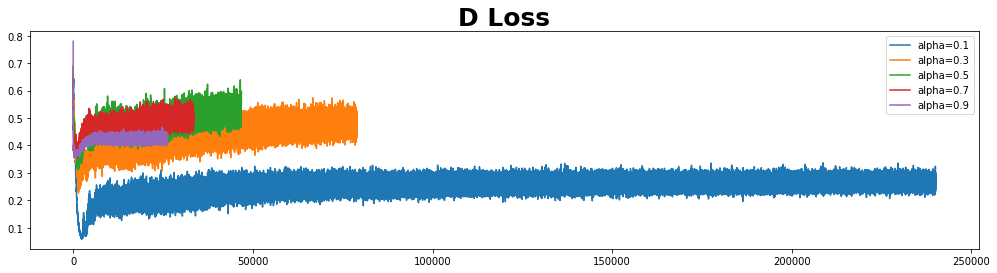

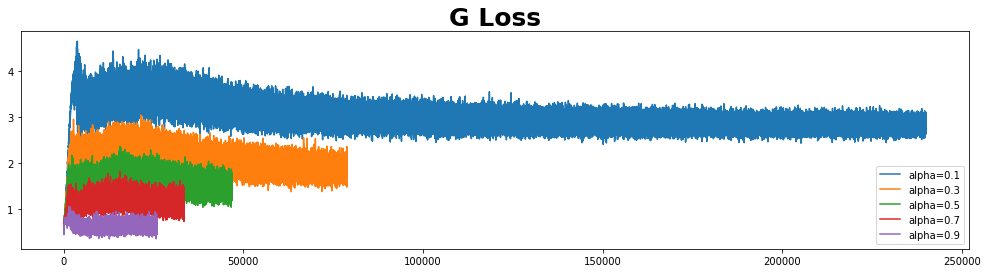

In [39]:
plt.figure(figsize=(17,4))
plt.title('D Loss', fontweight='bold', fontsize=25)
for i in alpha:
    plt.plot(losses_D[i], label='alpha='+str(i))
    plt.legend()
plt.show()

plt.figure(figsize=(17,4))
plt.title('G Loss', fontweight='bold', fontsize=25)
for i in alpha:
    plt.plot(losses_G[i], label='alpha='+str(i))
    plt.legend()
plt.show()
    

In [76]:
losses_G_e = {}
losses_D_e = {}
for a in alpha:
    idx_warp = [int((len(losses_G[a])-1)/(i+1)) for i in range(100)]
    idx_warp.append(0)
    idx_warp = idx_warp[::-1]
    losses_G_e[a] = losses_G[a][idx_warp]
    losses_D_e[a] = losses_D[a][idx_warp]

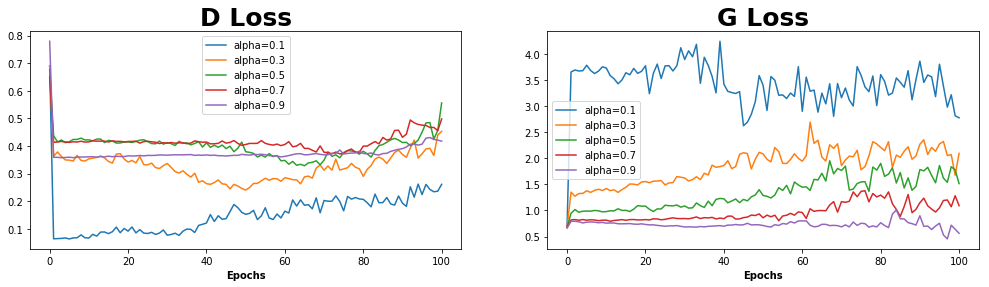

In [84]:
plt.figure(figsize=(17,4))

plt.subplot(1,2,1)
plt.title('D Loss', fontweight='bold', fontsize=25)
for i in alpha:
    plt.plot(losses_D_e[i], label='alpha='+str(i))
    plt.legend()
    plt.xlabel('Epochs', fontweight='bold')
#plt.show()

#plt.figure(figsize=(17,4))

plt.subplot(1,2,2)
plt.title('G Loss', fontweight='bold', fontsize=25)
for i in alpha:
    plt.plot(losses_G_e[i], label='alpha='+str(i))
    plt.legend()
    plt.xlabel('Epochs', fontweight='bold')
plt.show()